In [1]:
from IPython.display import YouTubeVideo
from IPython.display import Video
from ipywidgets import interact
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import scipy.stats as stats

In [2]:
def heatmap(data, labels, ax, colormap="Wistia", c="b", title=""):   
    im = ax.imshow(data, cmap=colormap)
    n = len(labels)
    ax.set_xticks(np.arange(n))
    ax.set_yticks(np.arange(n))
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)

    for i in range(n):
        for j in range(n):
            text = ax.text(j, i, data[i, j], ha="center", va="center", color=c, size='x-large')
        
    if title != "":
        ax.set_title(title)

def confusion_matrix(thresh = 160):
    mu1 = 130
    mu2= 200
    sigma = 20
    xs = [np.linspace(m-3.5*sigma, m+3.5*sigma, 100) for m in [mu1, mu2]]
    fig, axs= plt.subplots(1, 2, figsize=(15,5))

    for x, m in zip(xs,[mu1, mu2]):
        y = stats.norm.pdf(x, m, sigma)
        axs[0].plot(x, y)
        axs[0].fill_between(x, y, alpha=0.5)
    axs[0].axvline(x=thresh, c='k')
    
    positive = np.random.normal(mu2, sigma, 50)
    negative = np.random.normal(mu1, sigma, 50)
    
    mat = np.zeros((2,2), dtype=np.long)
    mat[0,0] = sum(positive >= thresh)
    mat[0,1] = sum(negative >= thresh)
    mat[1,0] = sum(positive < thresh)
    mat[1,1] = sum(negative < thresh)
    accuracy = (mat[0,0] + mat[1,1])/np.sum(mat)
    
    heatmap(mat, ['positive', 'negative'], axs[1], colormap="YlGn", c="r", title="accuracy: "+str(accuracy))

# Sygnały III

## Percepcja dźwięku

### Efekt McGurka

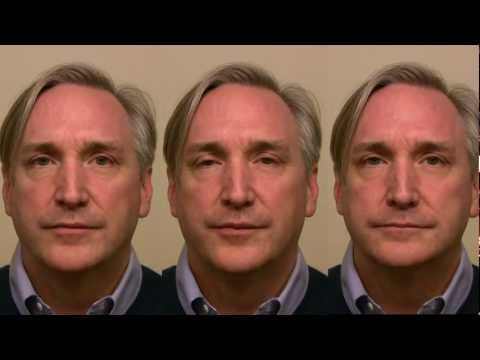

In [3]:
YouTubeVideo('PWGeUztTkRA', width=800, height=500)

[https://www.illusionsindex.org/i/mcgurk-effect](https://www.illusionsindex.org/i/mcgurk-effect)

### Percepcja częstotliwości

![Ślimak](https://www.ncbi.nlm.nih.gov/books/NBK10946/bin/ch13f5.jpg)

[https://www.ncbi.nlm.nih.gov/books/NBK10946/](https://www.ncbi.nlm.nih.gov/books/NBK10946/)

In [4]:
Video('http://www.auditoryneuroscience.com/sites/default/files/BMtocataAndFugue.mp4')

[http://www.auditoryneuroscience.com/ear/bm4_tocata_fugue](http://www.auditoryneuroscience.com/ear/bm4_tocata_fugue)

### Barwa dźwięku

![harmoniczne](https://upload.wikimedia.org/wikipedia/commons/b/b7/Harmonic_spectra_theoretical_x_y.png)

[https://en.wikipedia.org/wiki/Timbre](https://en.wikipedia.org/wiki/Timbre)

## Wytwarzanie mowy

![artykulacja](https://athena.ecs.csus.edu/~changw/Sounds/SpeechSynth/pics/anatomy.png)

[https://athena.ecs.csus.edu/~changw/Sounds/SpeechSynth/acoustics.html](https://athena.ecs.csus.edu/~changw/Sounds/SpeechSynth/acoustics.html)

![ton krtaniowy](https://newt.phys.unsw.edu.au/jw/graphics/sourcefilter.GIF)

[https://newt.phys.unsw.edu.au/jw/speechmodel.html](https://newt.phys.unsw.edu.au/jw/speechmodel.html)

### Częstotliwość podstawowa tonu krtaniowego w mowie

- Mężczyzni 85-180Hz
- Kobiety 165-255Hz
- Dzieci  250-300Hz

## Przykladowe metody detekcji częstotliwości podstawowej

### Harmonic Product Spectrum

![hps](https://ccrma.stanford.edu/~pdelac/154/m154paper_files/image018.gif)

[https://ccrma.stanford.edu/~pdelac/154/m154paper.htm](https://ccrma.stanford.edu/~pdelac/154/m154paper.htm)

### Analiza cepstralna

![cepstrum](http://vlab.amrita.edu/userfiles/7/image/speech/ex5/experiment6-theory-fig1.jpg)

[http://vlab.amrita.edu/?sub=3&brch=164&sim=615&cnt=1](http://vlab.amrita.edu/?sub=3&brch=164&sim=615&cnt=1)

## Funkcja okna

![leakage](https://www.cs.put.poznan.pl/amensfelt/pub/leakage.png)

## Macierz pomyłek

In [5]:
interact(confusion_matrix, thresh=(120,200,1))

interactive(children=(IntSlider(value=160, description='thresh', max=200, min=120), Output()), _dom_classes=('…

<function __main__.confusion_matrix(thresh=160)>